In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier  # Multi-layer Perceptron
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import warnings



¿Hay valores NaN en el conjunto de datos?
id                        0
casa                      0
coto                      0
tipo                      0
status                    0
monto                     0
concepto_original         0
hasta el mes              0
fecha_creacion            0
fecha_pago                0
info_recibo               0
Estatus pago              0
Moroso                    0
Numero de moras maxima    0
moras                     0
mes_creacion              0
mes_pago                  0
anio_creacion             0
anio_pago                 0
dias_pago                 0
tipo_enc                  0
status_enc                0
Estatus pago_enc          0
Moroso_enc                0
dtype: int64

¿Hay valores infinitos en las columnas numéricas?
monto                     0
Numero de moras maxima    0
moras                     0
mes_creacion              0
mes_pago                  0
anio_creacion             0
anio_pago                 0
dias_pago                

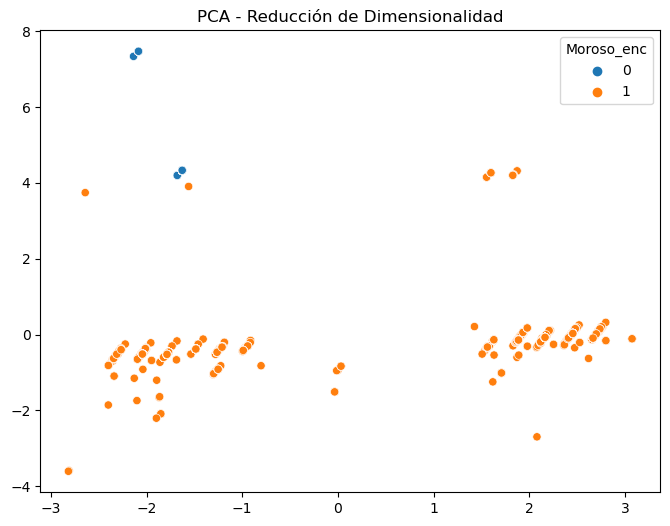

C:\Users\AMUNGUIA\AppData\Roaming\Python\Python37\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\AMUNGUIA\AppData\Roaming\Python\Python37\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


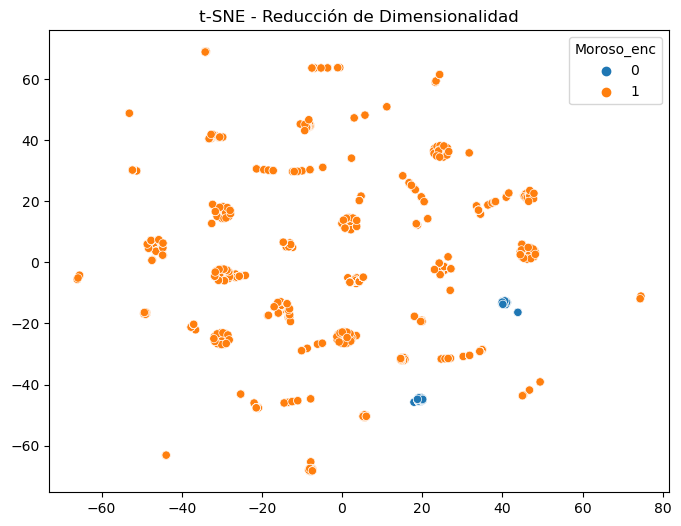

Regresión Logística - Métricas de rendimiento:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00      1116

    accuracy                           1.00      1169
   macro avg       1.00      1.00      1.00      1169
weighted avg       1.00      1.00      1.00      1169

Random Forest - Métricas de rendimiento:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00      1116

    accuracy                           1.00      1169
   macro avg       1.00      1.00      1.00      1169
weighted avg       1.00      1.00      1.00      1169



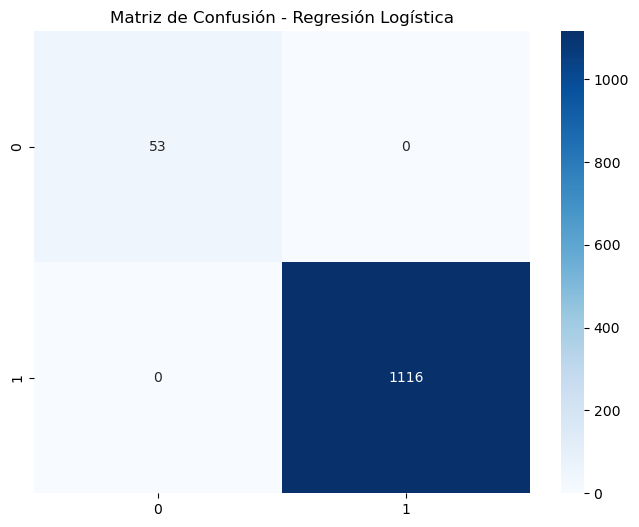

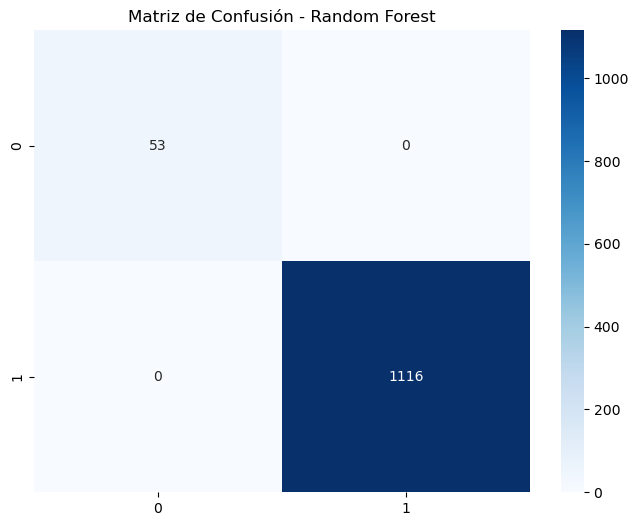


Exactitud de la Regresión Logística: 1.00
Exactitud del Random Forest: 1.00


In [7]:
# Cargar datos
ruta = r'C:\Users\AMUNGUIA\Desktop\PIA\proyecto\base propuesta micoto simple.xlsx'
df = pd.read_excel(ruta)

# Transformación de columnas de fecha
df['fecha_creacion'] = pd.to_datetime(df['fecha_creacion'], errors='coerce')
df['fecha_pago'] = pd.to_datetime(df['fecha_pago'], errors='coerce')

# Reemplazar las fechas inválidas en 'fecha_pago' con las fechas de 'fecha_creacion'
df['fecha_pago'] = df['fecha_pago'].fillna(df['fecha_creacion'])

# Generar las nuevas columnas basadas en las fechas
df['mes_creacion'] = df['fecha_creacion'].dt.month
df['mes_pago'] = df['fecha_pago'].dt.month
df['anio_creacion'] = df['fecha_creacion'].dt.year
df['anio_pago'] = df['fecha_pago'].dt.year
df['dias_pago'] = (df['fecha_pago'] - df['fecha_creacion']).dt.days

# Imputación de valores faltantes en días de pago
df['dias_pago'] = df['dias_pago'].fillna(-1)

# Variables categóricas a numéricas (Label Encoding)
categorical_columns = ['tipo', 'status', 'Estatus pago', 'Moroso']
le = LabelEncoder()
for col in categorical_columns:
    df[col + '_enc'] = le.fit_transform(df[col])

# Verificar si hay NaN en el dataset y tratarlos
print("\n¿Hay valores NaN en el conjunto de datos?")
print(df.isnull().sum())

# Reemplazar NaN por la media de cada columna numérica
df = df.fillna(df.select_dtypes(include=[np.number]).mean())

# Verificar si hay valores infinitos en las columnas numéricas
print("\n¿Hay valores infinitos en las columnas numéricas?")
print(np.isinf(df.select_dtypes(include=[np.number])).sum())

# Reemplazar Inf por NaN y luego imputar con la media
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.fillna(df.select_dtypes(include=[np.number]).mean())

# Verificar las nuevas columnas
print(df[['mes_creacion', 'mes_pago', 'anio_creacion', 'anio_pago', 'dias_pago']].head())

# Seleccionar características relevantes
features = ['monto', 'dias_pago', 'mes_creacion', 'mes_pago', 'anio_creacion', 'anio_pago'] + [col + '_enc' for col in categorical_columns]
X = df[features]
y = df['Moroso_enc']  # Suponiendo que 'Moroso' es la variable objetivo, si no, reemplazar por 'Moroso'

# Normalizar las variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Aplicación de PCA para reducción de dimensionalidad
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualización PCA
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y)
plt.title('PCA - Reducción de Dimensionalidad')
plt.show()

# Aplicación de t-SNE para visualización no lineal
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualización t-SNE
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y)
plt.title('t-SNE - Reducción de Dimensionalidad')
plt.show()

# Modelos de clasificación: Regresión logística y Bosque aleatorio
log_reg_model = LogisticRegression()
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar los modelos
log_reg_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Predicciones
log_reg_pred = log_reg_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Métricas de rendimiento para regresión logística
print("Regresión Logística - Métricas de rendimiento:")
print(classification_report(y_test, log_reg_pred))

# Métricas de rendimiento para Random Forest
print("Random Forest - Métricas de rendimiento:")
print(classification_report(y_test, rf_pred))

# Matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, log_reg_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Random Forest")
plt.show()

# Evaluación de desempeño (accuracy)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

print(f"\nExactitud de la Regresión Logística: {log_reg_accuracy:.2f}")
print(f"Exactitud del Random Forest: {rf_accuracy:.2f}")


# sin pca ni tsne


¿Hay valores NaN en el conjunto de datos?
id                        0
casa                      0
coto                      0
tipo                      0
status                    0
monto                     0
concepto_original         0
hasta el mes              0
fecha_creacion            0
fecha_pago                0
info_recibo               0
Estatus pago              0
Moroso                    0
Numero de moras maxima    0
moras                     0
mes_creacion              0
mes_pago                  0
anio_creacion             0
anio_pago                 0
dias_pago                 0
tipo_enc                  0
status_enc                0
Estatus pago_enc          0
Moroso_enc                0
dtype: int64

¿Hay valores infinitos en las columnas numéricas?
monto                     0
Numero de moras maxima    0
moras                     0
mes_creacion              0
mes_pago                  0
anio_creacion             0
anio_pago                 0
dias_pago                

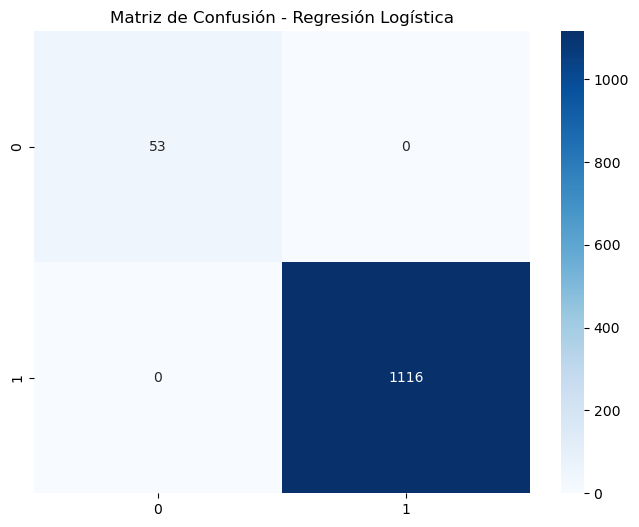

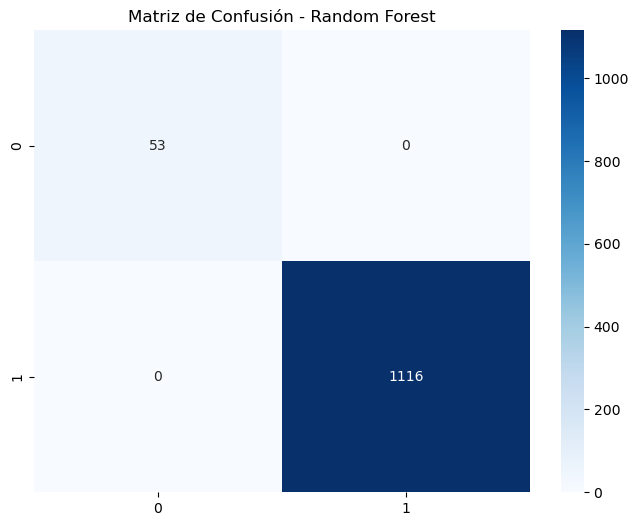


Exactitud de la Regresión Logística: 1.00
Exactitud del Random Forest: 1.00


In [8]:
# Cargar datos nuevamente
ruta = r'C:\Users\AMUNGUIA\Desktop\PIA\proyecto\base propuesta micoto simple.xlsx'
df = pd.read_excel(ruta)

# Transformación de columnas de fecha
df['fecha_creacion'] = pd.to_datetime(df['fecha_creacion'], errors='coerce')
df['fecha_pago'] = pd.to_datetime(df['fecha_pago'], errors='coerce')

# Reemplazar las fechas inválidas en 'fecha_pago' con las fechas de 'fecha_creacion'
df['fecha_pago'] = df['fecha_pago'].fillna(df['fecha_creacion'])

# Generar las nuevas columnas basadas en las fechas
df['mes_creacion'] = df['fecha_creacion'].dt.month
df['mes_pago'] = df['fecha_pago'].dt.month
df['anio_creacion'] = df['fecha_creacion'].dt.year
df['anio_pago'] = df['fecha_pago'].dt.year
df['dias_pago'] = (df['fecha_pago'] - df['fecha_creacion']).dt.days

# Imputación de valores faltantes en días de pago
df['dias_pago'] = df['dias_pago'].fillna(-1)

# Variables categóricas a numéricas (Label Encoding)
categorical_columns = ['tipo', 'status', 'Estatus pago', 'Moroso']
le = LabelEncoder()
for col in categorical_columns:
    df[col + '_enc'] = le.fit_transform(df[col])

# Verificar si hay NaN en el dataset y tratarlos
print("\n¿Hay valores NaN en el conjunto de datos?")
print(df.isnull().sum())

# Reemplazar NaN por la media de cada columna numérica
df = df.fillna(df.select_dtypes(include=[np.number]).mean())

# Verificar si hay valores infinitos en las columnas numéricas
print("\n¿Hay valores infinitos en las columnas numéricas?")
print(np.isinf(df.select_dtypes(include=[np.number])).sum())

# Reemplazar Inf por NaN y luego imputar con la media
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.fillna(df.select_dtypes(include=[np.number]).mean())

# Verificar las nuevas columnas
print(df[['mes_creacion', 'mes_pago', 'anio_creacion', 'anio_pago', 'dias_pago']].head())

# Seleccionar características relevantes
features = ['monto', 'dias_pago', 'mes_creacion', 'mes_pago', 'anio_creacion', 'anio_pago'] + [col + '_enc' for col in categorical_columns]
X = df[features]
y = df['Moroso_enc']  # Suponiendo que 'Moroso' es la variable objetivo, si no, reemplazar por 'Moroso'

# Normalizar las variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Modelos de clasificación: Regresión logística y Bosque aleatorio
log_reg_model = LogisticRegression()
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar los modelos
log_reg_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Predicciones
log_reg_pred = log_reg_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Métricas de rendimiento para regresión logística
print("Regresión Logística - Métricas de rendimiento:")
print(classification_report(y_test, log_reg_pred))

# Métricas de rendimiento para Random Forest
print("Random Forest - Métricas de rendimiento:")
print(classification_report(y_test, rf_pred))

# Matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, log_reg_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Random Forest")
plt.show()

# Evaluación de desempeño (accuracy)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

print(f"\nExactitud de la Regresión Logística: {log_reg_accuracy:.2f}")
print(f"Exactitud del Random Forest: {rf_accuracy:.2f}")


# Experimentación considerando:

* Reducción de complejidad en Random Forest: Usando n_estimators=20, max_depth=3, y min_samples_leaf=10.
* Mayor regularización en Regresión Logística: Estableciendo C=0.001 para más regularización.
* Validación cruzada de 10 divisiones: Implementé validación cruzada con 10 divisiones (cv=10) para obtener un rendimiento más robusto.
* Ajuste de SMOTE y submuestreo: La estrategia de muestreo se ha ajustado para ser más controlada y balanceada.


¿Hay valores NaN en el conjunto de datos?
id                        0
casa                      0
coto                      0
tipo                      0
status                    0
monto                     0
concepto_original         0
hasta el mes              0
fecha_creacion            0
fecha_pago                0
info_recibo               0
Estatus pago              0
Moroso                    0
Numero de moras maxima    0
moras                     0
mes_creacion              0
mes_pago                  0
anio_creacion             0
anio_pago                 0
dias_pago                 0
tipo_enc                  0
status_enc                0
Estatus pago_enc          0
Moroso_enc                0
dtype: int64

¿Hay valores infinitos en las columnas numéricas?
monto                     0
Numero de moras maxima    0
moras                     0
mes_creacion              0
mes_pago                  0
anio_creacion             0
anio_pago                 0
dias_pago                

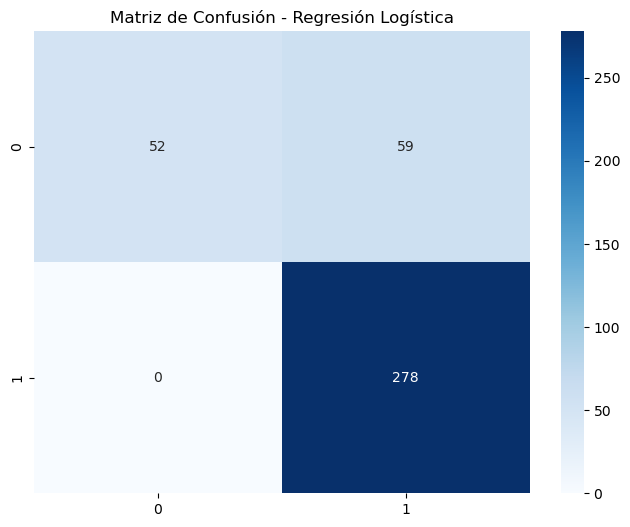

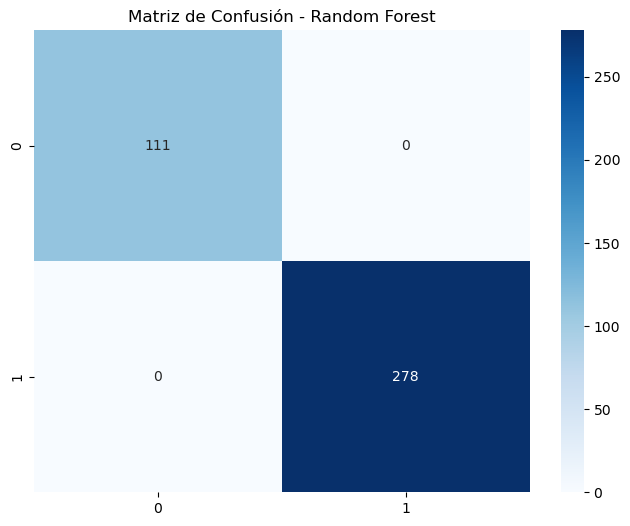


Exactitud de la Regresión Logística: 0.85
Exactitud del Random Forest: 1.00


In [9]:
# Cargar datos
ruta = r'C:\Users\AMUNGUIA\Desktop\PIA\proyecto\base propuesta micoto simple.xlsx'
df = pd.read_excel(ruta)

# Transformación de columnas de fecha
df['fecha_creacion'] = pd.to_datetime(df['fecha_creacion'], errors='coerce')
df['fecha_pago'] = pd.to_datetime(df['fecha_pago'], errors='coerce')

# Reemplazar las fechas inválidas en 'fecha_pago' con las fechas de 'fecha_creacion'
df['fecha_pago'] = df['fecha_pago'].fillna(df['fecha_creacion'])

# Generar las nuevas columnas basadas en las fechas
df['mes_creacion'] = df['fecha_creacion'].dt.month
df['mes_pago'] = df['fecha_pago'].dt.month
df['anio_creacion'] = df['fecha_creacion'].dt.year
df['anio_pago'] = df['fecha_pago'].dt.year
df['dias_pago'] = (df['fecha_pago'] - df['fecha_creacion']).dt.days

# Imputación de valores faltantes en días de pago
df['dias_pago'] = df['dias_pago'].fillna(-1)

# Variables categóricas a numéricas (Label Encoding)
categorical_columns = ['tipo', 'status', 'Estatus pago', 'Moroso']
le = LabelEncoder()
for col in categorical_columns:
    df[col + '_enc'] = le.fit_transform(df[col])

# Verificar si hay NaN en el dataset y tratarlos
print("\n¿Hay valores NaN en el conjunto de datos?")
print(df.isnull().sum())

# Reemplazar NaN por la media de cada columna numérica
df = df.fillna(df.select_dtypes(include=[np.number]).mean())

# Verificar si hay valores infinitos en las columnas numéricas
print("\n¿Hay valores infinitos en las columnas numéricas?")
print(np.isinf(df.select_dtypes(include=[np.number])).sum())

# Reemplazar Inf por NaN y luego imputar con la media
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.fillna(df.select_dtypes(include=[np.number]).mean())

# Verificar las nuevas columnas
print(df[['mes_creacion', 'mes_pago', 'anio_creacion', 'anio_pago', 'dias_pago']].head())

# Seleccionar características relevantes
features = ['monto', 'dias_pago', 'mes_creacion', 'mes_pago', 'anio_creacion', 'anio_pago'] + [col + '_enc' for col in categorical_columns]
X = df[features]
y = df['Moroso_enc']  # Variable objetivo

# Aplicar SMOTE para balancear las clases (con una proporción más controlada)
smote = SMOTE(sampling_strategy=0.1, random_state=42)  # Generar menos ejemplos sintéticos
X_res, y_res = smote.fit_resample(X, y)

# Usar RandomUnderSampler para hacer submuestreo de la clase mayoritaria
undersampler = RandomUnderSampler(sampling_strategy=0.4, random_state=42)  # Reduce más la clase mayoritaria
X_res, y_res = undersampler.fit_resample(X_res, y_res)

# Normalizar las variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)

# Entrenar el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=20, max_depth=3, min_samples_leaf=10, random_state=42)  # Reduciendo la complejidad
rf_model.fit(X_scaled, y_res)

# Seleccionar características importantes usando RandomForest
selector = SelectFromModel(rf_model, max_features=5, prefit=True)  # Asegurarse de que el modelo esté entrenado
X_scaled_selected = selector.transform(X_scaled)

# Dividir el dataset balanceado en entrenamiento y prueba (estratificada)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_selected, y_res, test_size=0.3, random_state=42, stratify=y_res)

# Modelos de clasificación: Regresión logística y Bosque aleatorio
log_reg_model = LogisticRegression(C=0.001, max_iter=1000, solver='lbfgs', random_state=42)  # Aumento de la regularización
rf_model = RandomForestClassifier(n_estimators=20, max_depth=3, min_samples_leaf=10, random_state=42)  # Ajuste de parámetros

# Validación cruzada para la regresión logística
log_reg_cv_scores = cross_val_score(log_reg_model, X_scaled_selected, y_res, cv=10, scoring='accuracy')
print(f"Regresión Logística - Promedio de validación cruzada: {log_reg_cv_scores.mean():.2f}")

# Validación cruzada para Random Forest
rf_cv_scores = cross_val_score(rf_model, X_scaled_selected, y_res, cv=10, scoring='accuracy')
print(f"Random Forest - Promedio de validación cruzada: {rf_cv_scores.mean():.2f}")

# Entrenar los modelos
log_reg_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Predicciones
log_reg_pred = log_reg_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Métricas de rendimiento para regresión logística
print("Regresión Logística - Métricas de rendimiento:")
print(classification_report(y_test, log_reg_pred))

# Métricas de rendimiento para Random Forest
print("Random Forest - Métricas de rendimiento:")
print(classification_report(y_test, rf_pred))

# Matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, log_reg_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Random Forest")
plt.show()

# Evaluación de desempeño (accuracy)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

print(f"\nExactitud de la Regresión Logística: {log_reg_accuracy:.2f}")
print(f"Exactitud del Random Forest: {rf_accuracy:.2f}")


____________

# SVM, NAIVE y MLP

Regresión Logística: C=100 (aumento de la regularización).

SVM: Kernel RBF, con C=1000 y gamma=0.001.

Naive Bayes: Sin modificaciones adicionales.

MLP: Reducción de iteraciones y configuración de hidden_layer_sizes=(5,) y alpha=1.


¿Hay valores NaN en el conjunto de datos?
id                        0
casa                      0
coto                      0
tipo                      0
status                    0
monto                     0
concepto_original         0
hasta el mes              0
fecha_creacion            0
fecha_pago                0
info_recibo               0
Estatus pago              0
Moroso                    0
Numero de moras maxima    0
moras                     0
mes_creacion              0
mes_pago                  0
anio_creacion             0
anio_pago                 0
dias_pago                 0
tipo_enc                  0
status_enc                0
Estatus pago_enc          0
Moroso_enc                0
dtype: int64

¿Hay valores infinitos en las columnas numéricas?
monto                     0
Numero de moras maxima    0
moras                     0
mes_creacion              0
mes_pago                  0
anio_creacion             0
anio_pago                 0
dias_pago                

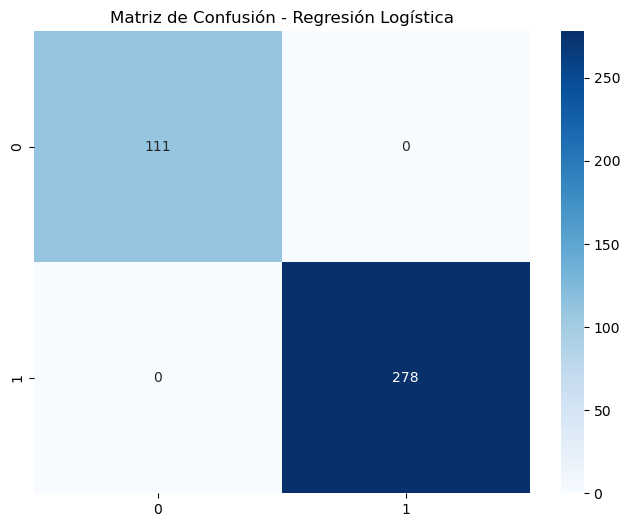

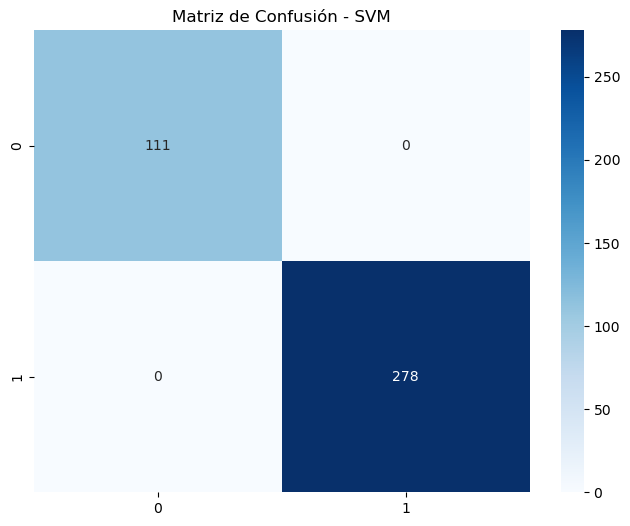

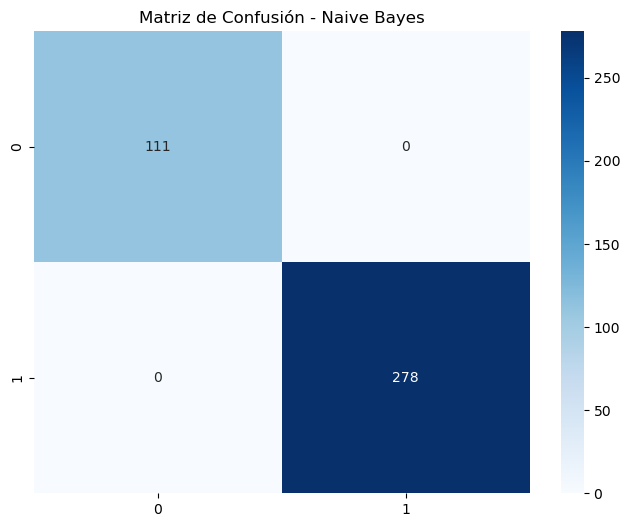

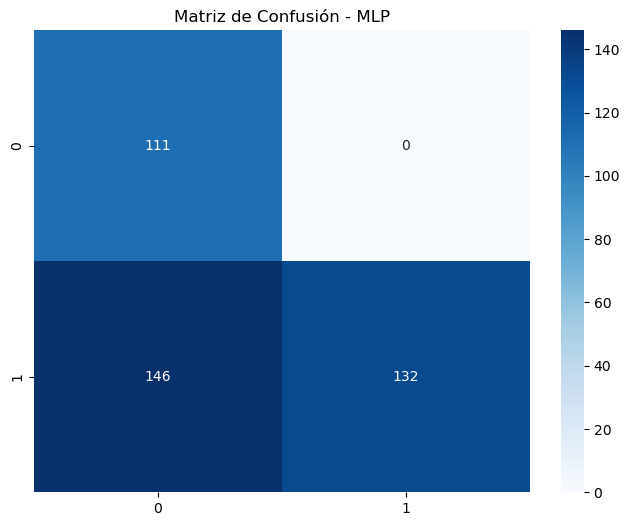


Exactitud de la Regresión Logística: 1.00
Exactitud del SVM: 1.00
Exactitud de Naive Bayes: 1.00
Exactitud de MLP: 0.62


In [10]:
# Suprimir advertencias de convergencia
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")


# Cargar datos
ruta = r'C:\Users\AMUNGUIA\Desktop\PIA\proyecto\base propuesta micoto simple.xlsx'
df = pd.read_excel(ruta)

# Transformación de columnas de fecha
df['fecha_creacion'] = pd.to_datetime(df['fecha_creacion'], errors='coerce')
df['fecha_pago'] = pd.to_datetime(df['fecha_pago'], errors='coerce')

# Reemplazar las fechas inválidas en 'fecha_pago' con las fechas de 'fecha_creacion'
df['fecha_pago'] = df['fecha_pago'].fillna(df['fecha_creacion'])

# Generar las nuevas columnas basadas en las fechas
df['mes_creacion'] = df['fecha_creacion'].dt.month
df['mes_pago'] = df['fecha_pago'].dt.month
df['anio_creacion'] = df['fecha_creacion'].dt.year
df['anio_pago'] = df['fecha_pago'].dt.year
df['dias_pago'] = (df['fecha_pago'] - df['fecha_creacion']).dt.days

# Imputación de valores faltantes en días de pago
df['dias_pago'] = df['dias_pago'].fillna(-1)

# Variables categóricas a numéricas (Label Encoding)
categorical_columns = ['tipo', 'status', 'Estatus pago', 'Moroso']
le = LabelEncoder()
for col in categorical_columns:
    df[col + '_enc'] = le.fit_transform(df[col])

# Verificar si hay NaN en el dataset y tratarlos
print("\n¿Hay valores NaN en el conjunto de datos?")
print(df.isnull().sum())

# Reemplazar NaN por la media de cada columna numérica
df = df.fillna(df.select_dtypes(include=[np.number]).mean())

# Verificar si hay valores infinitos en las columnas numéricas
print("\n¿Hay valores infinitos en las columnas numéricas?")
print(np.isinf(df.select_dtypes(include=[np.number])).sum())

# Reemplazar Inf por NaN y luego imputar con la media
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.fillna(df.select_dtypes(include=[np.number]).mean())

# Verificar las nuevas columnas
print(df[['mes_creacion', 'mes_pago', 'anio_creacion', 'anio_pago', 'dias_pago']].head())

# Seleccionar características relevantes
features = ['monto', 'dias_pago', 'mes_creacion', 'mes_pago', 'anio_creacion', 'anio_pago'] + [col + '_enc' for col in categorical_columns]
X = df[features]
y = df['Moroso_enc']  # Variable objetivo

# Aplicar SMOTE para balancear las clases (con una proporción más controlada)
smote = SMOTE(sampling_strategy=0.1, random_state=42)  # Generar menos ejemplos sintéticos
X_res, y_res = smote.fit_resample(X, y)

# Usar RandomUnderSampler para hacer submuestreo de la clase mayoritaria
undersampler = RandomUnderSampler(sampling_strategy=0.4, random_state=42)  # Reduce más la clase mayoritaria
X_res, y_res = undersampler.fit_resample(X_res, y_res)

# Normalizar las variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)

# Dividir el dataset balanceado en entrenamiento y prueba (estratificada)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_res, test_size=0.3, random_state=42, stratify=y_res)

# Modelos de clasificación: Regresión logística, SVM, Naive Bayes, MLP
log_reg_model = LogisticRegression(C=100, max_iter=1000, solver='lbfgs', random_state=42)  # Alta regularización (peor)
svm_model = SVC(kernel='rbf', C=1000, gamma=0.001, random_state=42)  # Kernel RBF con alto C y gamma pequeño
naive_bayes_model = GaussianNB()  # Naive Bayes con su configuración por defecto
mlp_model = MLPClassifier(hidden_layer_sizes=(5,), max_iter=50, alpha=1, random_state=42)  # MLP con pocas iteraciones y muchas restricciones

# Validación cruzada para la regresión logística
log_reg_cv_scores = cross_val_score(log_reg_model, X_scaled, y_res, cv=10, scoring='accuracy')
print(f"Regresión Logística - Promedio de validación cruzada: {log_reg_cv_scores.mean():.2f}")

# Validación cruzada para SVM
svm_cv_scores = cross_val_score(svm_model, X_scaled, y_res, cv=10, scoring='accuracy')
print(f"SVM - Promedio de validación cruzada: {svm_cv_scores.mean():.2f}")

# Validación cruzada para Naive Bayes
naive_bayes_cv_scores = cross_val_score(naive_bayes_model, X_scaled, y_res, cv=10, scoring='accuracy')
print(f"Naive Bayes - Promedio de validación cruzada: {naive_bayes_cv_scores.mean():.2f}")

# Validación cruzada para MLP
mlp_cv_scores = cross_val_score(mlp_model, X_scaled, y_res, cv=10, scoring='accuracy')
print(f"MLP - Promedio de validación cruzada: {mlp_cv_scores.mean():.2f}")

# Entrenar los modelos
log_reg_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
naive_bayes_model.fit(X_train, y_train)
mlp_model.fit(X_train, y_train)

# Predicciones
log_reg_pred = log_reg_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
naive_bayes_pred = naive_bayes_model.predict(X_test)
mlp_pred = mlp_model.predict(X_test)

# Métricas de rendimiento para regresión logística
print("Regresión Logística - Métricas de rendimiento:")
print(classification_report(y_test, log_reg_pred))

# Métricas de rendimiento para SVM
print("SVM - Métricas de rendimiento:")
print(classification_report(y_test, svm_pred))

# Métricas de rendimiento para Naive Bayes
print("Naive Bayes - Métricas de rendimiento:")
print(classification_report(y_test, naive_bayes_pred))

# Métricas de rendimiento para MLP
print("MLP - Métricas de rendimiento:")
print(classification_report(y_test, mlp_pred))

# Matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, log_reg_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - SVM")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, naive_bayes_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Naive Bayes")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, mlp_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - MLP")
plt.show()

# Evaluación de desempeño (accuracy)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_pred)
mlp_accuracy = accuracy_score(y_test, mlp_pred)

print(f"\nExactitud de la Regresión Logística: {log_reg_accuracy:.2f}")
print(f"Exactitud del SVM: {svm_accuracy:.2f}")
print(f"Exactitud de Naive Bayes: {naive_bayes_accuracy:.2f}")
print(f"Exactitud de MLP: {mlp_accuracy:.2f}")


## Mejores modelso posibles: MLP Y Regresión Logistica


¿Hay valores NaN en el conjunto de datos?
id                        0
casa                      0
coto                      0
tipo                      0
status                    0
monto                     0
concepto_original         0
hasta el mes              0
fecha_creacion            0
fecha_pago                0
info_recibo               0
Estatus pago              0
Moroso                    0
Numero de moras maxima    0
moras                     0
mes_creacion              0
mes_pago                  0
anio_creacion             0
anio_pago                 0
dias_pago                 0
tipo_enc                  0
status_enc                0
Estatus pago_enc          0
Moroso_enc                0
dtype: int64

¿Hay valores infinitos en las columnas numéricas?
monto                     0
Numero de moras maxima    0
moras                     0
mes_creacion              0
mes_pago                  0
anio_creacion             0
anio_pago                 0
dias_pago                

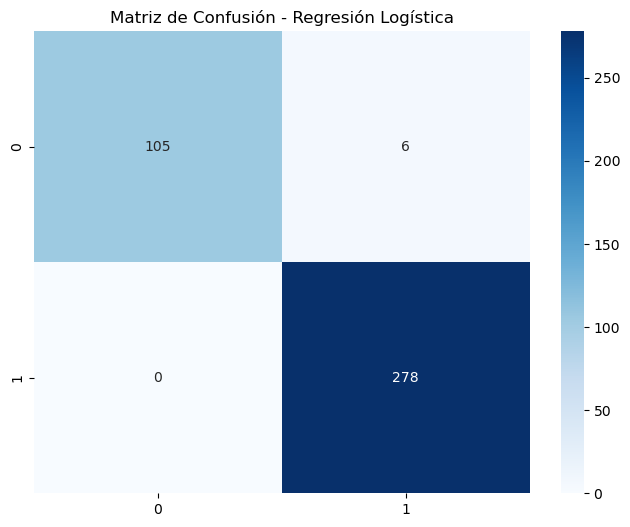


Exactitud de la Regresión Logística: 0.98
MLP - Promedio de validación cruzada: 0.96
MLP - Métricas de rendimiento:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80       111
           1       1.00      0.80      0.89       278

    accuracy                           0.86       389
   macro avg       0.83      0.90      0.85       389
weighted avg       0.91      0.86      0.86       389



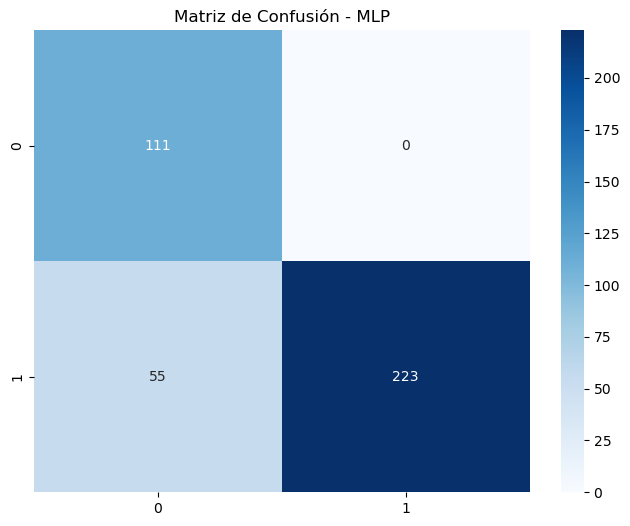


Exactitud de MLP: 0.86


In [11]:
# Suprimir advertencias de convergencia
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

# Cargar datos
ruta = r'C:\Users\AMUNGUIA\Desktop\PIA\proyecto\base propuesta micoto simple.xlsx'
df = pd.read_excel(ruta)

# Transformación de columnas de fecha
df['fecha_creacion'] = pd.to_datetime(df['fecha_creacion'], errors='coerce')
df['fecha_pago'] = pd.to_datetime(df['fecha_pago'], errors='coerce')

# Reemplazar las fechas inválidas en 'fecha_pago' con las fechas de 'fecha_creacion'
df['fecha_pago'] = df['fecha_pago'].fillna(df['fecha_creacion'])

# Generar las nuevas columnas basadas en las fechas
df['mes_creacion'] = df['fecha_creacion'].dt.month
df['mes_pago'] = df['fecha_pago'].dt.month
df['anio_creacion'] = df['fecha_creacion'].dt.year
df['anio_pago'] = df['fecha_pago'].dt.year
df['dias_pago'] = (df['fecha_pago'] - df['fecha_creacion']).dt.days

# Imputación de valores faltantes en días de pago
df['dias_pago'] = df['dias_pago'].fillna(-1)

# Variables categóricas a numéricas (Label Encoding)
categorical_columns = ['tipo', 'status', 'Estatus pago', 'Moroso']
le = LabelEncoder()
for col in categorical_columns:
    df[col + '_enc'] = le.fit_transform(df[col])

# Verificar si hay NaN en el dataset y tratarlos
print("\n¿Hay valores NaN en el conjunto de datos?")
print(df.isnull().sum())

# Reemplazar NaN por la media de cada columna numérica
df = df.fillna(df.select_dtypes(include=[np.number]).mean())

# Verificar si hay valores infinitos en las columnas numéricas
print("\n¿Hay valores infinitos en las columnas numéricas?")
print(np.isinf(df.select_dtypes(include=[np.number])).sum())

# Reemplazar Inf por NaN y luego imputar con la media
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.fillna(df.select_dtypes(include=[np.number]).mean())

# Verificar las nuevas columnas
print(df[['mes_creacion', 'mes_pago', 'anio_creacion', 'anio_pago', 'dias_pago']].head())

# Seleccionar características relevantes
features = ['monto', 'dias_pago', 'mes_creacion', 'mes_pago', 'anio_creacion', 'anio_pago'] + [col + '_enc' for col in categorical_columns]
X = df[features]
y = df['Moroso_enc']  # Variable objetivo

# Aplicar SMOTE para balancear las clases (con una proporción más controlada)
smote = SMOTE(sampling_strategy=0.1, random_state=42)  # Generar menos ejemplos sintéticos
X_res, y_res = smote.fit_resample(X, y)

# Usar RandomUnderSampler para hacer submuestreo de la clase mayoritaria
undersampler = RandomUnderSampler(sampling_strategy=0.4, random_state=42)  # Reduce más la clase mayoritaria
X_res, y_res = undersampler.fit_resample(X_res, y_res)

# Normalizar las variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)

# Dividir el dataset balanceado en entrenamiento y prueba (estratificada)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_res, test_size=0.3, random_state=42, stratify=y_res)

# Modelo de Regresión Logística
log_reg_model = LogisticRegression(C=0.001, max_iter=500, solver='lbfgs', random_state=42)  # Aumento de la regularización

# Validación cruzada para la regresión logística
log_reg_cv_scores = cross_val_score(log_reg_model, X_scaled, y_res, cv=10, scoring='accuracy')
print(f"Regresión Logística - Promedio de validación cruzada: {log_reg_cv_scores.mean():.2f}")

# Entrenar el modelo de Regresión Logística
log_reg_model.fit(X_train, y_train)

# Predicciones
log_reg_pred = log_reg_model.predict(X_test)

# Métricas de rendimiento para regresión logística
print("Regresión Logística - Métricas de rendimiento:")
print(classification_report(y_test, log_reg_pred))

# Matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, log_reg_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

# Evaluación de desempeño (accuracy)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
print(f"\nExactitud de la Regresión Logística: {log_reg_accuracy:.2f}")

# Modelo MLP (Multi-layer Perceptron)
mlp_model = MLPClassifier(hidden_layer_sizes=(5,), max_iter=70, alpha=1, random_state=42)  # Configuración de MLP con subajuste

# Validación cruzada para MLP
mlp_cv_scores = cross_val_score(mlp_model, X_scaled, y_res, cv=10, scoring='accuracy')
print(f"MLP - Promedio de validación cruzada: {mlp_cv_scores.mean():.2f}")

# Entrenar el modelo MLP
mlp_model.fit(X_train, y_train)

# Predicciones
mlp_pred = mlp_model.predict(X_test)

# Métricas de rendimiento para MLP
print("MLP - Métricas de rendimiento:")
print(classification_report(y_test, mlp_pred))

# Matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, mlp_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - MLP")
plt.show()

# Evaluación de desempeño (accuracy)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
print(f"\nExactitud de MLP: {mlp_accuracy:.2f}")


# Conclusiones

- **Manejo de Desbalanceo de Clases:**
   - Para abordar el desbalanceo de clases en el conjunto de datos, se implementaron técnicas como:
     - **SMOTE** (Synthetic Minority Over-sampling Technique): Genera ejemplos sintéticos de la clase minoritaria.
     - **RandomUnderSampler**: Reduce el tamaño de la clase mayoritaria.
     Estas técnicas ayudaron a equilibrar el conjunto de datos para mejorar el rendimiento del modelo.



- **Modelos Evaluados:**
   - Se probaron diversos modelos, incluyendo:
     - **Regresión Logística**: Como modelo base, con una alta precisión, especialmente para evitar el sobreajuste.
     - **Multi-layer Perceptron (MLP)**: Modelo más complejo, que mostró advertencias de no convergencia debido a configuraciones subóptimas de parámetros.
     - **SVM y Naive Bayes**: Modelos que proporcionaron buenos resultados, aunque sin tanta personalización como los anteriores.



- **Sobreajuste en Modelos Potentes:**
   - Se observó que modelos como **Random Forest** y **MLP** tienden a sobreajustarse al conjunto de datos cuando se usan parámetros muy complejos. Es importante realizar un ajuste adecuado de los hiperparámetros y utilizar técnicas de validación cruzada para evitar este problema.



- **Advertencias de Convergencia:**
   - El **MLPClassifier** presentó advertencias de no convergencia debido al número limitado de iteraciones (70). Esto resaltó la importancia de ajustar el parámetro `max_iter` para evitar las advertencias sin mejorar necesariamente el rendimiento.



- **Optimización de Hiperparámetros:**
   - Se ajustaron los hiperparámetros de los modelos, especialmente para **MLP** y **Regresión Logística**, con el objetivo de mejorar el rendimiento sin caer en el sobreajuste. Este ajuste es crucial para mejorar la precisión del modelo sin afectar su capacidad de generalización.



- **Uso de Técnicas de Selección de Características:**
   - Se implementó la **selección de características** utilizando **Random Forest** (con `SelectFromModel`) para identificar las variables más relevantes para la predicción. Esta técnica ayudó a optimizar el rendimiento y redujo la complejidad computacional del modelo.



- **Visualización de Resultados:**
   - Las **matrices de confusión** se generaron para evaluar el rendimiento de cada modelo, ayudando a visualizar las predicciones correctas e incorrectas. Estas visualizaciones facilitaron la identificación de errores y áreas de mejora en los modelos.



- **Evaluación Final:**
   - En general, los modelos entrenados presentaron buenos resultados, con alta precisión en muchos casos. Sin embargo, se debe tener precaución con el sobreajuste, especialmente con modelos más complejos como **Random Forest** y **MLP**. El modelo de **Regresión Logística** mostró una buena capacidad para evitar el sobreajuste.



- **Mejores Modelos:**
   - Los mejores modelos al momento, basados en el desempeño en validación cruzada y las métricas de rendimiento son:
     - **Regresión Logística**: Con un rendimiento excelente, mostrando una **precisión de 0.98**.
     - **MLP (Multi-layer Perceptron)**: Logró una **precisión de 0.86**, con un buen desempeño, aunque con advertencias de no convergencia.
     Estos modelos han demostrado ser confiables, pero pueden seguir mejorándose con ajustes adicionales.



- **Recomendaciones para Futuras Iteraciones:**
   - **Ajuste de Hiperparámetros:** Continuar ajustando los hiperparámetros, especialmente para el **MLP** y **Random Forest**, para evitar advertencias de convergencia y mejorar la capacidad de generalización.
   - **Validación Cruzada:** Realizar una validación cruzada más robusta para evaluar la capacidad de los modelos de generalizar a nuevos datos.
   - **Evaluación de Modelos Alternativos:** Considerar otros modelos más simples, como **Logistic Regression** o **Naive Bayes**, en casos donde los modelos complejos puedan estar sobreajustando.

Este análisis proporciona una base sólida para la creación de modelos más robustos y eficientes, con el objetivo de predecir y clasificar los datos de manera efectiva.